In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('../')

In [2]:
from IPython.display import clear_output
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# schedule = pd.DataFrame(columns=pd.MultiIndex.from_product([range(3), ['s','e']]), index=range(6))

In [3]:
from schedules import Schedule
schedule = Schedule(6,3)
schedule.df

0         1         2     
     s    e    s    e    s    e
0  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  NaN

In [4]:
schedule.df.at[0, 0] =  [0, 1]
schedule.df.at[2, 0] =  [1, 2]
schedule.df.at[3, 0] =  [2, 3]
schedule.df.at[4, 0] =  [3, 4]

schedule.df.at[1, 1] =  [1, 2]
schedule.df.at[2, 1] =  [2, 3]
schedule.df.at[3, 1] =  [3, 4]
schedule.df.at[5, 1] =  [4, 5]

schedule.df.at[0, 2] =  [2, 3]
schedule.df.at[2, 2] =  [3, 4]
schedule.df.at[3, 2] =  [4, 5]
schedule.df.at[4, 2] =  [5, 6]


In [5]:
schedule.df

0         1         2     
     s    e    s    e    s    e
0    0    1  NaN  NaN    2    3
1  NaN  NaN    1    2  NaN  NaN
2    1    2    2    3    3    4
3    2    3    3    4    4    5
4    3    4  NaN  NaN    5    6
5  NaN  NaN    4    5  NaN  NaN

In [6]:
schedule.lengths

,0,1,2
0,1,NaN,1
1,NaN,1,NaN
2,1,1,1
3,1,1,1
4,1,NaN,1
5,NaN,1,NaN


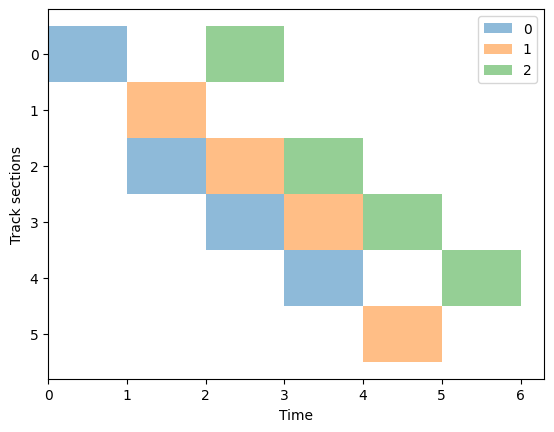

In [7]:
schedule.plot()

In [8]:
schedule.is_a_point_switch(1,2,3)

False

In [11]:
schedule
# add_delay(schedule, 0, 0, 1)
schedule.add_delay(0, 0, 1.)
# add_delay(schedule, 0, 3, 3)

     0         1         2     
     s    e    s    e    s    e
0  1.0  3.0  NaN  NaN    2    3
1  NaN  NaN    1    2  NaN  NaN
2  2.0  3.0    2    3    3    4
3  3.0  4.0    3    4    4    5
4  4.0  5.0  NaN  NaN    5    6
5  NaN  NaN    4    5  NaN  NaN

In [11]:
%%time
schedule.num_track_sections
schedule.num_trains
schedule.trains

CPU times: user 128 µs, sys: 41 µs, total: 169 µs
Wall time: 180 µs


[0, 1, 2]

In [12]:
m = schedule.add_delay(0, 0, 1)
m.conflicts(0)

,1,2
0,NaN,NaN
1,NaN,NaN
2,2,NaN
3,3,NaN
4,NaN,NaN
5,NaN,NaN


(True, (2, 1))

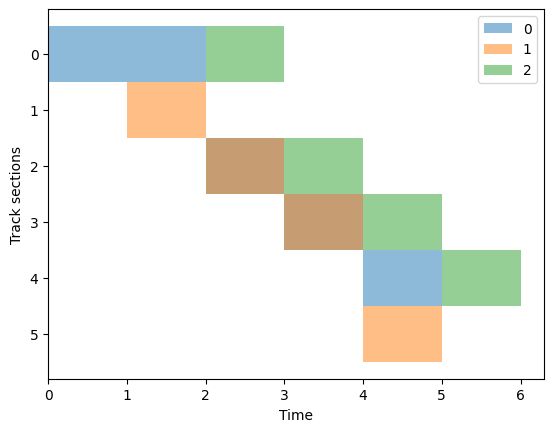

In [13]:
m.plot()
m.has_conflicts(0), m.first_conflict(0)

In [14]:
train1, train2, train3 = 0, 1, 2

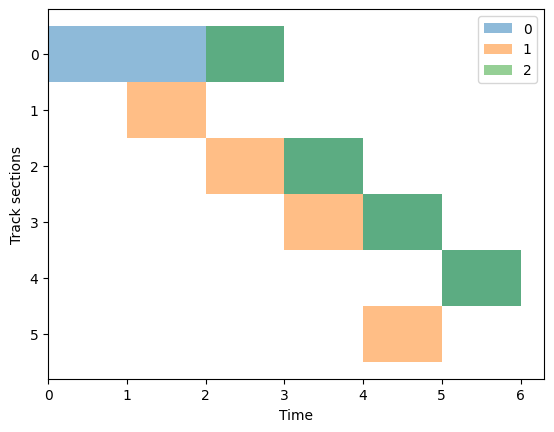

In [15]:
m1 = m.shift_train_after(train1, train2, 2)
m1.plot()

3

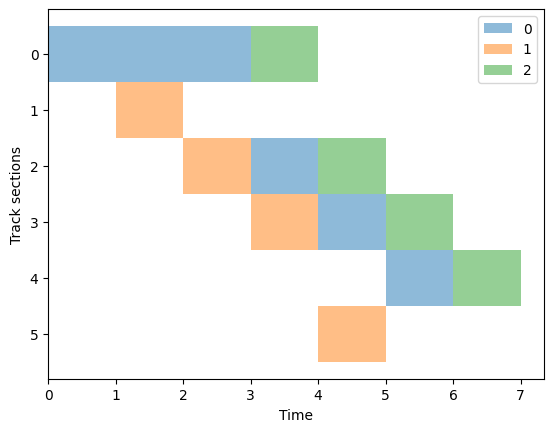

In [16]:
mprime1 = m1.shift_train_after(train3, train1, 0)
mprime1.plot()
mprime1.total_delay_at_stations(schedule, [4, 5])

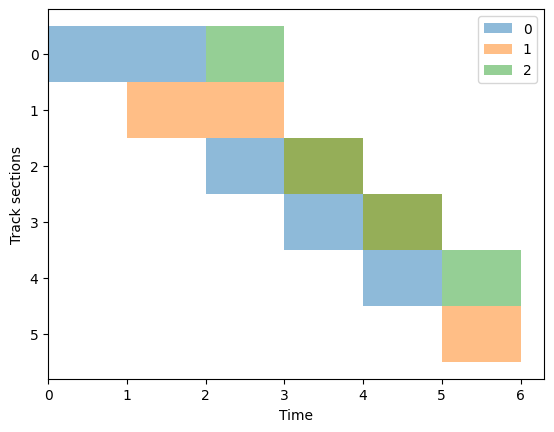

In [17]:


m2=m.shift_train_after(train2, train1, 2)
m2.plot()

3

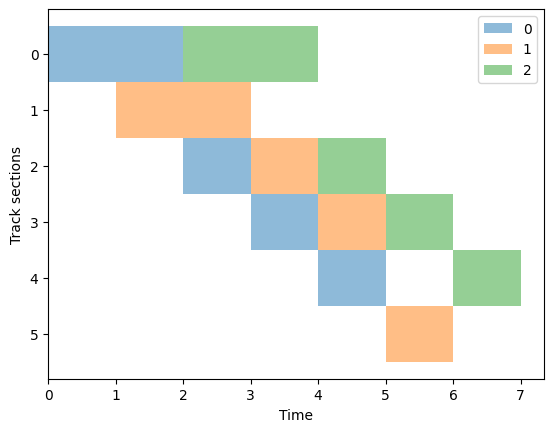

In [18]:
m3=m2.shift_train_after(train3, train2, 2)
m3.plot()
m3.total_delay_at_stations(schedule, [4,5])

3

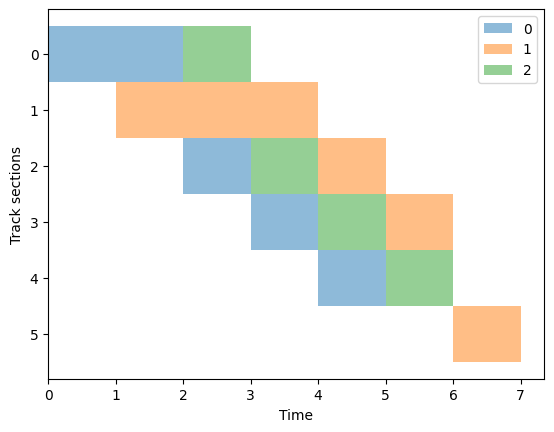

In [19]:
m4=m2.shift_train_after(train2, train3, 2)
m4.plot()
m4.total_delay_at_stations(schedule, [4,5])

In [20]:
schedule

     0         1         2     
     s    e    s    e    s    e
0    0    1  NaN  NaN    2    3
1  NaN  NaN    1    2  NaN  NaN
2    1    2    2    3    3    4
3    2    3    3    4    4    5
4    3    4  NaN  NaN    5    6
5  NaN  NaN    4    5  NaN  NaN

In [21]:
trains_enter_at = m.df.loc[2, pd.IndexSlice[[0,1],'s']].astype(float)

In [22]:
trains_enter_at

0  s    2.0
1  s    2.0
Name: 2, dtype: float64

In [23]:
%time
m.first_in(0,1,2)
schedule.first_in(0, 1, 2)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 13.4 µs


0

In [24]:
schedule.num_track_sections

6

In [25]:
schedule.num_trains

3

In [26]:
schedule.df.fillna(0).values

array([[0, 1, 0, 0, 2, 3],
       [0, 0, 1, 2, 0, 0],
       [1, 2, 2, 3, 3, 4],
       [2, 3, 3, 4, 4, 5],
       [3, 4, 0, 0, 5, 6],
       [0, 0, 4, 5, 0, 0]])

In [27]:
l = schedule.trajectory(0)

In [28]:
{(l[i], l[i+1]) for i in range(len(l)-1)}

{(0, 2), (2, 3), (3, 4)}

In [29]:
edges = set()
for train in schedule.trains:
    l = schedule.trajectory(train)
    edges = edges.union({(l[i], l[i+1]) for i in range(len(l)-1)})

In [30]:
edges

{(0, 2), (1, 2), (2, 3), (3, 4), (3, 5)}

In [31]:
for e in edges:
    print(e)

(2, 3)
(0, 2)
(1, 2)
(3, 4)
(3, 5)


In [32]:
import networkx as nx

In [33]:
G = nx.DiGraph(edges)


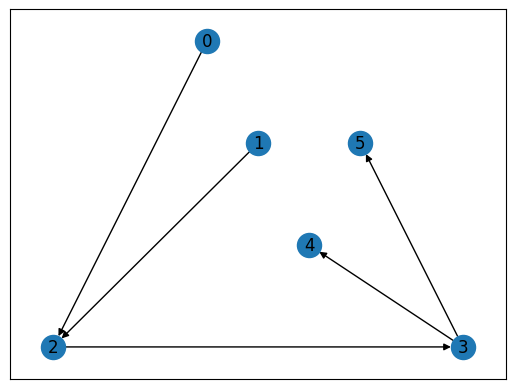

In [34]:
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos)

In [35]:
schedule.graph.nodes

NodeView((2, 3, 0, 1, 4, 5))

In [36]:
schedule.graph.nodes[1]['times']

array([0, 0, 1, 2, 0, 0])

In [37]:
{i: row for i, row in enumerate(schedule.df.fillna(0).values)}

{0: array([0, 1, 0, 0, 2, 3]),
 1: array([0, 0, 1, 2, 0, 0]),
 2: array([1, 2, 2, 3, 3, 4]),
 3: array([2, 3, 3, 4, 4, 5]),
 4: array([3, 4, 0, 0, 5, 6]),
 5: array([0, 0, 4, 5, 0, 0])}

In [38]:
plt.pause(5)

In [39]:
# %%time
#

# fig,ax = plt.subplots(1,1)
# schedule.plot()
# plt.pause(1)
# clear_output(wait=True)
# m.plot()
# plt.pause(1)
# clear_output(wait=True)
# m2.plot()
# plt.pause(1)
# clear_output(wait=True)
# m3.plot()


# Deux trains, le 2e est plus lent

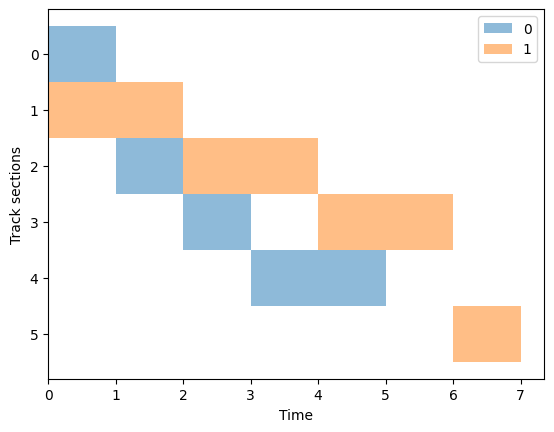

In [40]:
schedule2 = Schedule(6,2)


schedule2.df.at[0, 0] =  [0, 1]
schedule2.df.at[2, 0] =  [1, 2]
schedule2.df.at[3, 0] =  [2, 3]
schedule2.df.at[4, 0] =  [3, 5]

schedule2.df.at[1, 1] =  [0, 2]
schedule2.df.at[2, 1] =  [2, 4]
schedule2.df.at[3, 1] =  [4, 6]
schedule2.df.at[5, 1] =  [6, 7]

schedule2.plot()

2

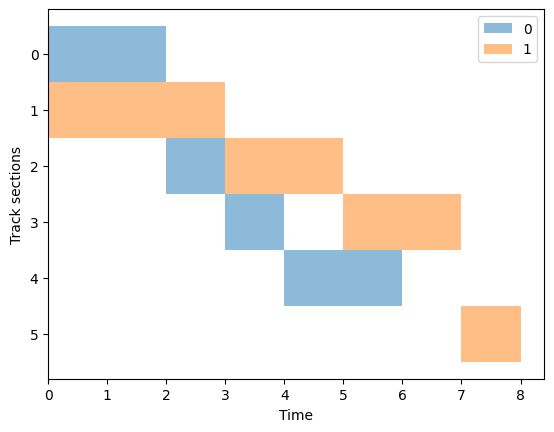

In [41]:
s1 = schedule2.add_delay(0,0,1)
# s1.plot()
s2 = s1.shift_train_after(1,0,2)
s2.plot()
s2.total_delay_at_stations(schedule2, [4,5])

4

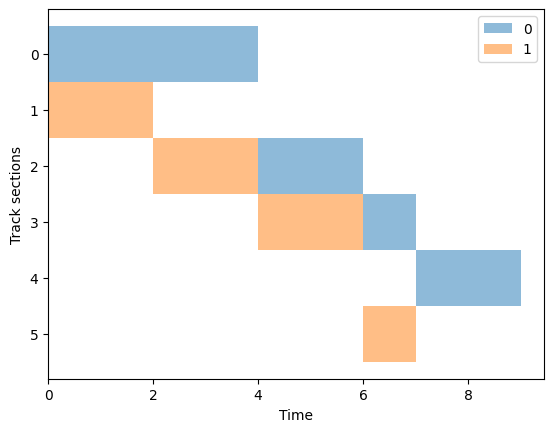

In [42]:
s3 = s1.shift_train_after(0,1,2)
s4 = s3.shift_train_after(0,1,3)
s4.plot()
s4.total_delay_at_stations(schedule2, [4,5])

# Le 2e est + rapide

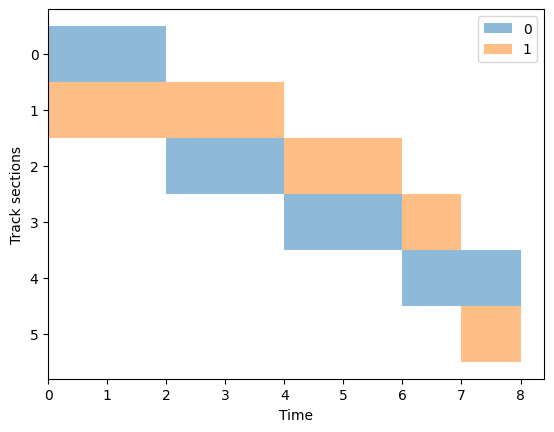

In [43]:
schedule3 = Schedule(6,2)

schedule3.df.at[0, 0] =  [0, 2]
schedule3.df.at[2, 0] =  [2, 4]
schedule3.df.at[3, 0] =  [4, 6]
schedule3.df.at[4, 0] =  [6, 8]

schedule3.df.at[1, 1] =  [0, 4]
schedule3.df.at[2, 1] =  [4, 6]
schedule3.df.at[3, 1] =  [6, 7]
schedule3.df.at[5, 1] =  [7, 8]

schedule3.plot()

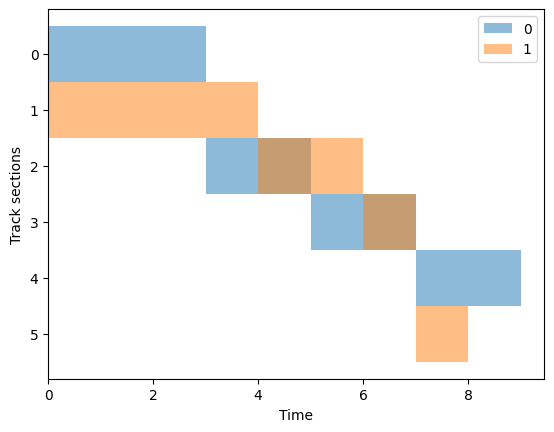

In [44]:
p = schedule3.add_delay(0,0,1)
p.plot()

4

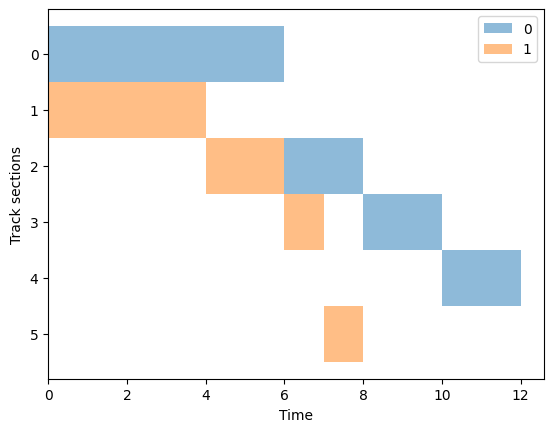

In [45]:
p2 = p.shift_train_after(0,1,2)
p2.plot()
p2.total_delay_at_stations(schedule3, [4,5])

2

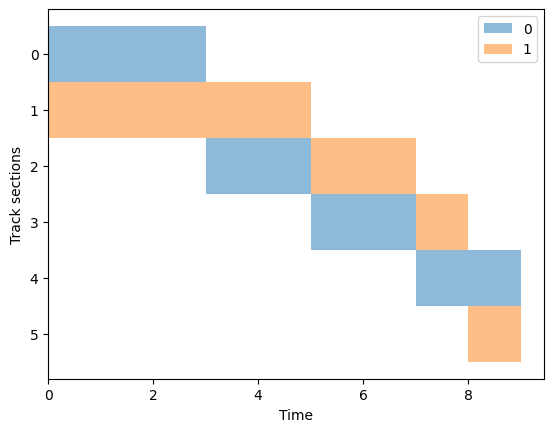

In [46]:
p3 = p.shift_train_after(1,0,2)
p3.plot()
p3.total_delay_at_stations(schedule3, [4,5])

In [47]:
# Pas de conflit => nouveau retard ? [+tard que le premier]
#   si pas de nouveau retard --> reward (total_delay_at_stations)

# train retardé crée un conflit hors switch --> réparer --> retour au 1.
# Conflit après switch => décision -> actualisat° du train retardé --> retour au 1


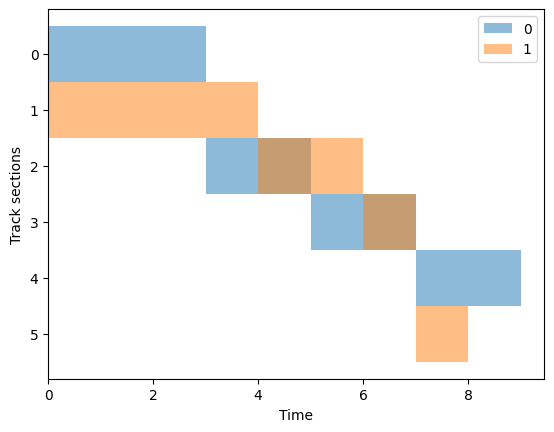

In [48]:
p.plot()

In [49]:
import copy
# self_ = s1
self_ = m

delayed_train = 0
#

def propagate_delay(self_, delayed_train: int) -> pd.DataFrame:

    new_schedule = copy.deepcopy(self_)
    decision = False
    while new_schedule.has_conflicts(delayed_train):
        decision = False
        if new_schedule.has_conflicts(delayed_train):

            track_section, other_train = new_schedule.first_conflict(delayed_train)
            decision = new_schedule.is_a_point_switch(delayed_train, other_train, track_section)

            if not decision:
                first_in = new_schedule.first_in(delayed_train, other_train, track_section)
                delayed_train = other_train if first_in==delayed_train else delayed_train
                new_schedule = new_schedule.shift_train_after(delayed_train, first_in, track_section)
            else:
                break
    return new_schedule


In [50]:
# Mettre propagate directement dans add_delay et dans shift_train_after ?

In [51]:
from regul_env import RegulEnv

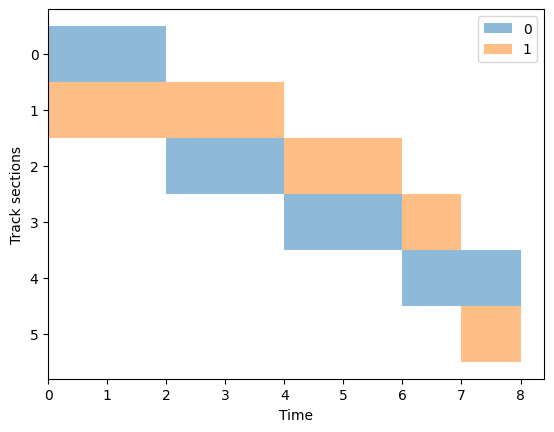

In [52]:
env = RegulEnv(schedule3, [4, 5])
env.render()

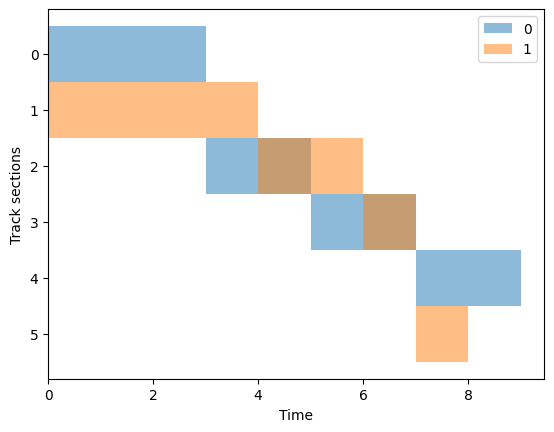

In [53]:
env.reset(train=0, delay=1, track_section=0)
env.render()

-4


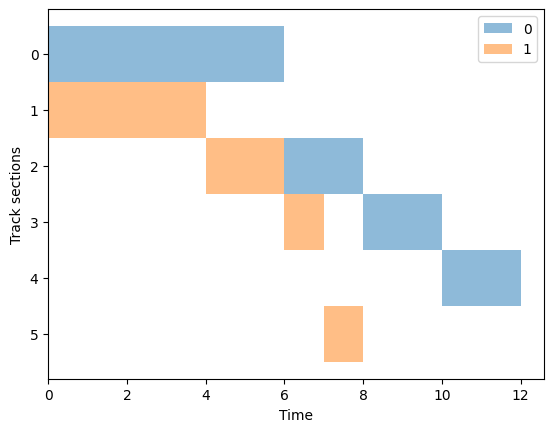

In [54]:
for a in [0]:
    _, reward, done, _ = env.step(a)
env.render()
print(reward)

In [55]:
done, reward

(True, -4)

In [56]:
env.stations

[4, 5]

In [57]:
env.schedule.trains

[0, 1]

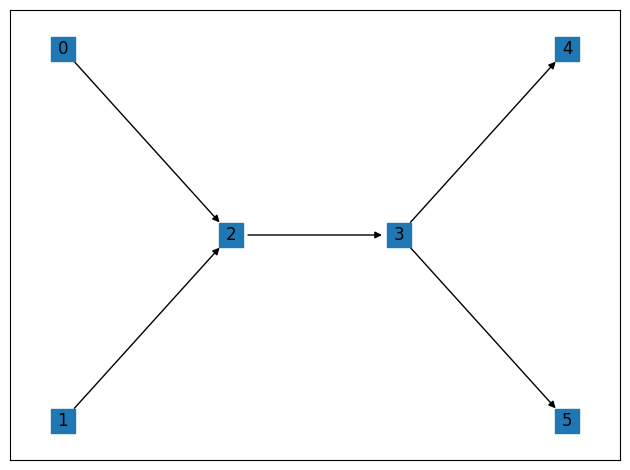

In [65]:
schedule.draw_graph()
plt.tight_layout()